In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import models_creation as pred_model

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#from sklearn import tree

from matplotlib import pyplot as plt

import joblib

from mordred import Calculator, descriptors
import mordred
from rdkit import Chem

import warnings
warnings.filterwarnings('ignore')

In [2]:
load_prepared_data = pd.read_excel('../Data/Kolchicyna_machine_learning.xlsx')
load_prepared_data = load_prepared_data.drop(columns=['Unnamed: 0'])

In [3]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [4]:
to_prediction = pd.read_excel('../Data/Proposed_structures_with_AI_colchicyne_tanimoto_similarity_.xlsx')
mol_objs = [Chem.MolFromSmiles(smi) for smi in to_prediction['AI_generated_SMILES']] 

calculate_descriptors = False
if calculate_descriptors == True:
    calc = Calculator(descriptors, ignore_3D=True)
    molecular_descriptors = calc.pandas(mol_objs)
    molecular_descriptors['SMILES'] = to_prediction['AI_generated_SMILES']
    molecular_descriptors = molecular_descriptors.applymap(is_morder_missing)
    molecular_descriptors = molecular_descriptors.dropna(subset=['MDEO-12'])
    molecular_descriptors.to_excel('../Data/New_structures_molecular_descriptors.xlsx')
else:
    molecular_descriptors = pd.read_excel('../Data/New_structures_molecular_descriptors.xlsx')

In [5]:
molecular_descriptors.head()

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES
0,0,23.120393,18.971182,0,1,39.868485,2.525781,4.995962,39.868485,1.286080,...,76.110947,429.226371,6.923006,2466,61,156,187,10.861111,7.388889,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
1,1,23.120393,18.971182,0,1,39.868485,2.525781,4.995962,39.868485,1.286080,...,76.110947,426.251858,6.557721,2466,61,156,187,10.861111,7.388889,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
2,2,23.827499,19.325995,0,1,41.234073,2.525784,4.995966,41.234073,1.288565,...,77.202427,440.267508,6.474522,2760,62,160,191,11.111111,7.638889,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
3,3,25.908380,21.011762,0,1,44.265079,2.539061,5.010823,44.265079,1.301914,...,84.705631,465.237604,7.157502,3124,67,178,216,11.333333,7.916667,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
4,4,23.948820,19.806455,0,1,40.972555,2.454223,4.851643,40.972555,1.280392,...,81.511277,439.221954,7.200360,2754,57,160,188,11.111111,7.555556,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...


In [6]:
molecular_descriptors.shape

(1289, 1615)

# A549

In [7]:
target = 'A549'
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-5]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,A549
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,7.966576
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,7.935542
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,7.962574
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,7.978811
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.048177


In [8]:
## create best model and make predictions to selected structures with retransformation

In [9]:
## The best model is: Decision Tree (correlation_threshold = 0.51, 5 features, 4 depth, random_state=15) -> to simple, another one is finally used
## The best model is: Random Forest (correlation_threshold = 0.51, 5 features, 2 estimators, random_state=15)

In [10]:
model, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.51, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=2,
                                                                                                    target_column_name = target,
                                                                                                    random_state=15,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)
print("R^2 score: " + str(r2_score(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Mean squared error: "+str(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print('Mean absolute error: ' + str(mean_absolute_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Root Mean Square Error: "+ str(math.sqrt(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target]))))

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.022797
1                  AATS0are   -0.139064
2                    AATS0d    0.027592
3                   AATS0dv   -0.136049
4                    AATS0i    0.168958
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.022797                    0.022797
1                  AATS0are   -0.139064                    0.139064
2                    AATS0d    0.027592                    0.027592
3                   AATS0dv   -0.136049                    0.136049
4                    AATS0i    0.168958                    0.168958
     molecular descriptor name  corr_value  absolute correlation value
226                     AMID_O   -0.557717                    0.557717
505     

In [11]:
# save
joblib.dump(model, "Random_forest/random_forest_model_2_estimators_A549.joblib")

['Random_forest/random_forest_model_2_estimators_A549.joblib']

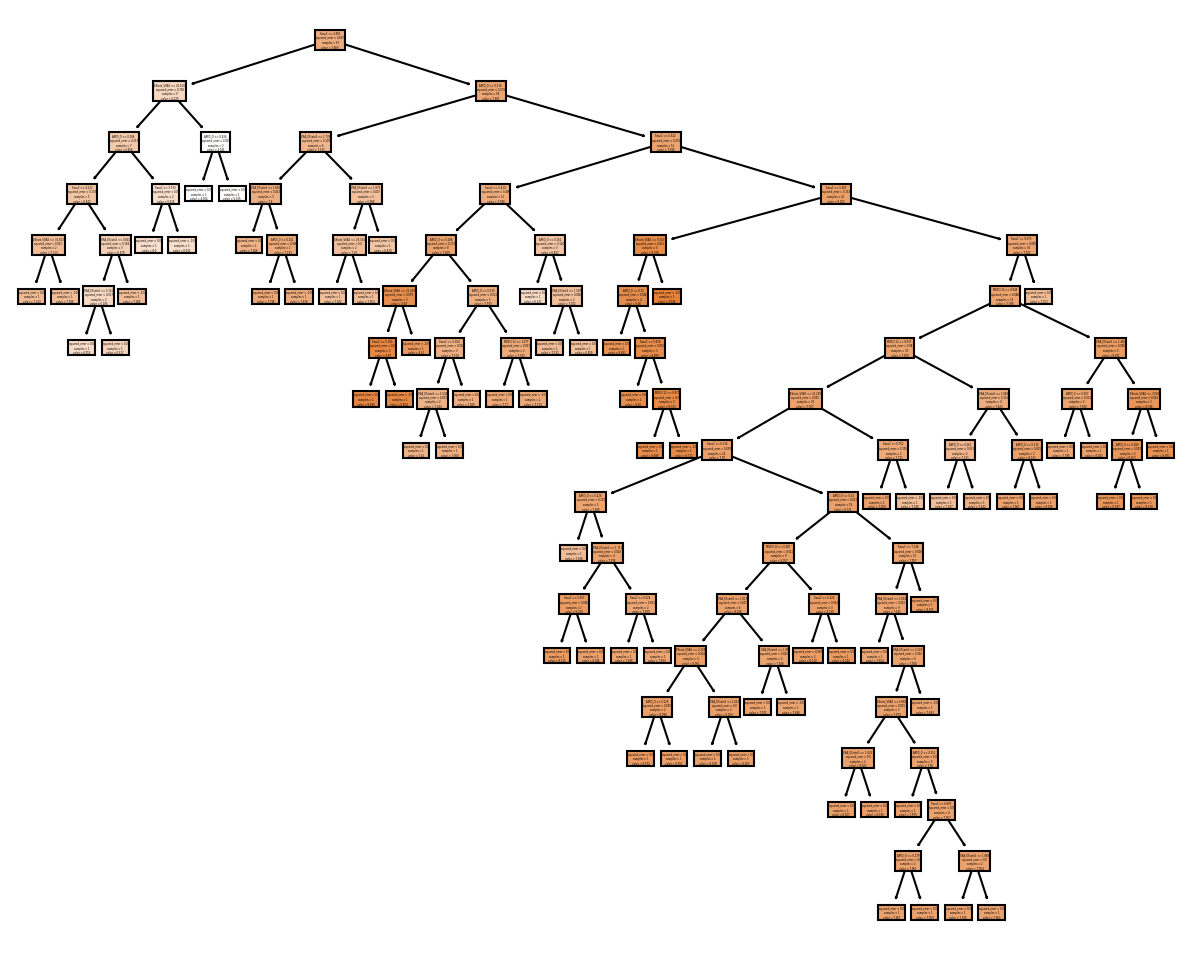

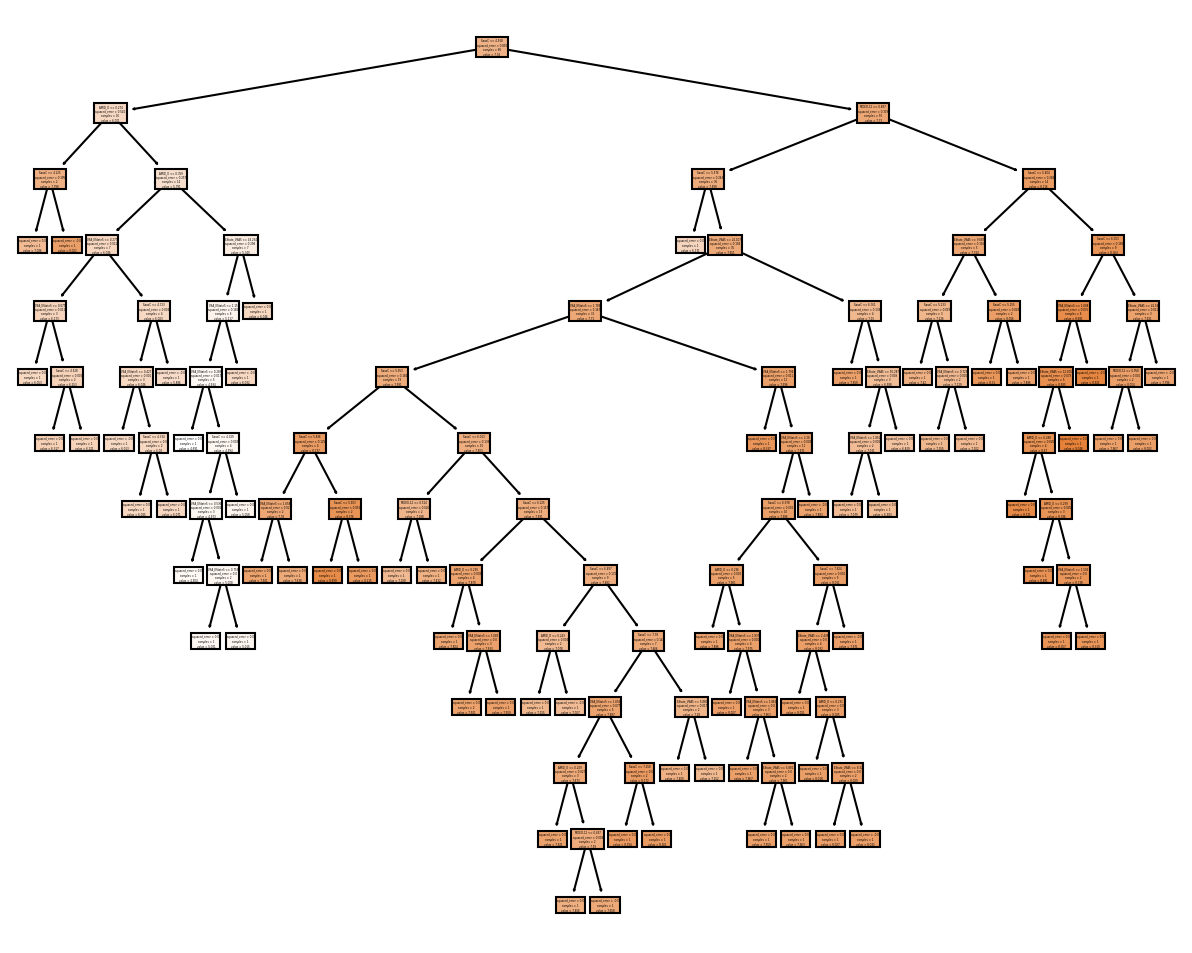

In [12]:
for x, decision_tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(hist2['molecular descriptor name']),
             filled=True)
    plt.savefig('Random_forest/random_forest_2_'+str(x)+'_model_A549.pdf',bbox_inches = "tight")

In [13]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
226,AMID_O,-0.557717,0.557717
505,EState_VSA5,-0.534748,0.534748
791,MDEO-12,-0.555724,0.555724
921,SaasC,0.513071,0.513071
1091,VSA_EState5,0.526082,0.526082


In [14]:
predicted_activity = model.predict(molecular_descriptors[hist2['molecular descriptor name']])

In [15]:
len(predicted_activity)

1289

In [16]:
smiles = molecular_descriptors['SMILES'].to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [17]:
save_to_df['Predicted A549'] = predicted_activity

In [18]:
save_to_df.head()

,SMILES,Predicted A549
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427


# BALB_3T3

In [19]:
target = 'BALB/3T3'
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-1]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,BALB/3T3
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,7.991400
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,7.844664
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,7.931814
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,7.958607
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.002614


In [20]:
## The best model is: Random Forest (correlation_threshold = 0.51, 6 features, 2 estimators, random_state=42)

In [21]:
model, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.51, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=2,
                                                                                                    target_column_name = target,
                                                                                                    random_state=42,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)
print("R^2 score: " + str(r2_score(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Mean squared error: "+str(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print('Mean absolute error: ' + str(mean_absolute_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Root Mean Square Error: "+ str(math.sqrt(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target]))))

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.020817
1                  AATS0are   -0.148257
2                    AATS0d    0.022999
3                   AATS0dv   -0.137980
4                    AATS0i    0.133257
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.020817                    0.020817
1                  AATS0are   -0.148257                    0.148257
2                    AATS0d    0.022999                    0.022999
3                   AATS0dv   -0.137980                    0.137980
4                    AATS0i    0.133257                    0.133257
    molecular descriptor name  corr_value  absolute correlation value
226                    AMID_O   -0.546843                    0.546843
505       

In [22]:
# save
joblib.dump(model, "Random_forest/random_forest_model_2_estimators_BALB_3T3.joblib")

['Random_forest/random_forest_model_2_estimators_BALB_3T3.joblib']

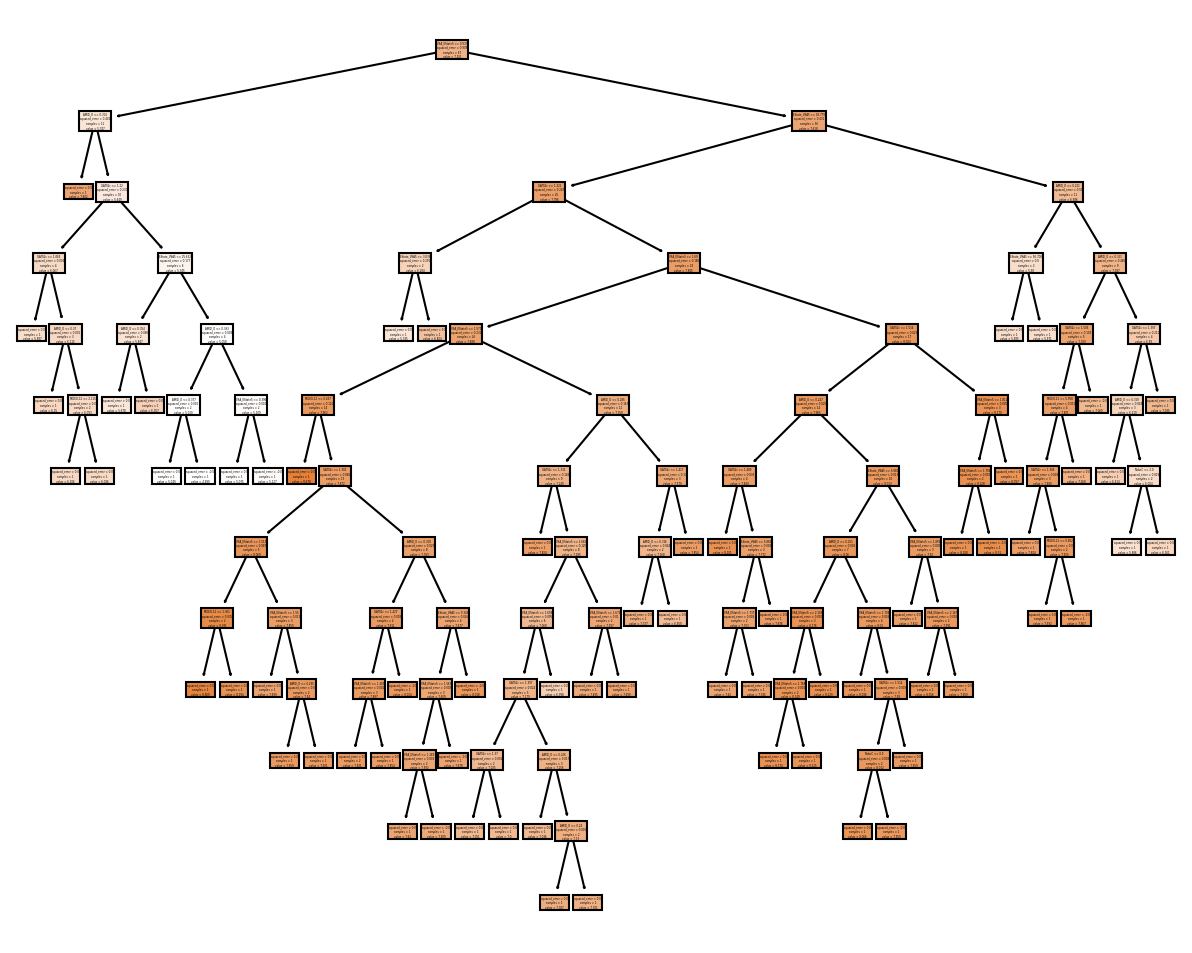

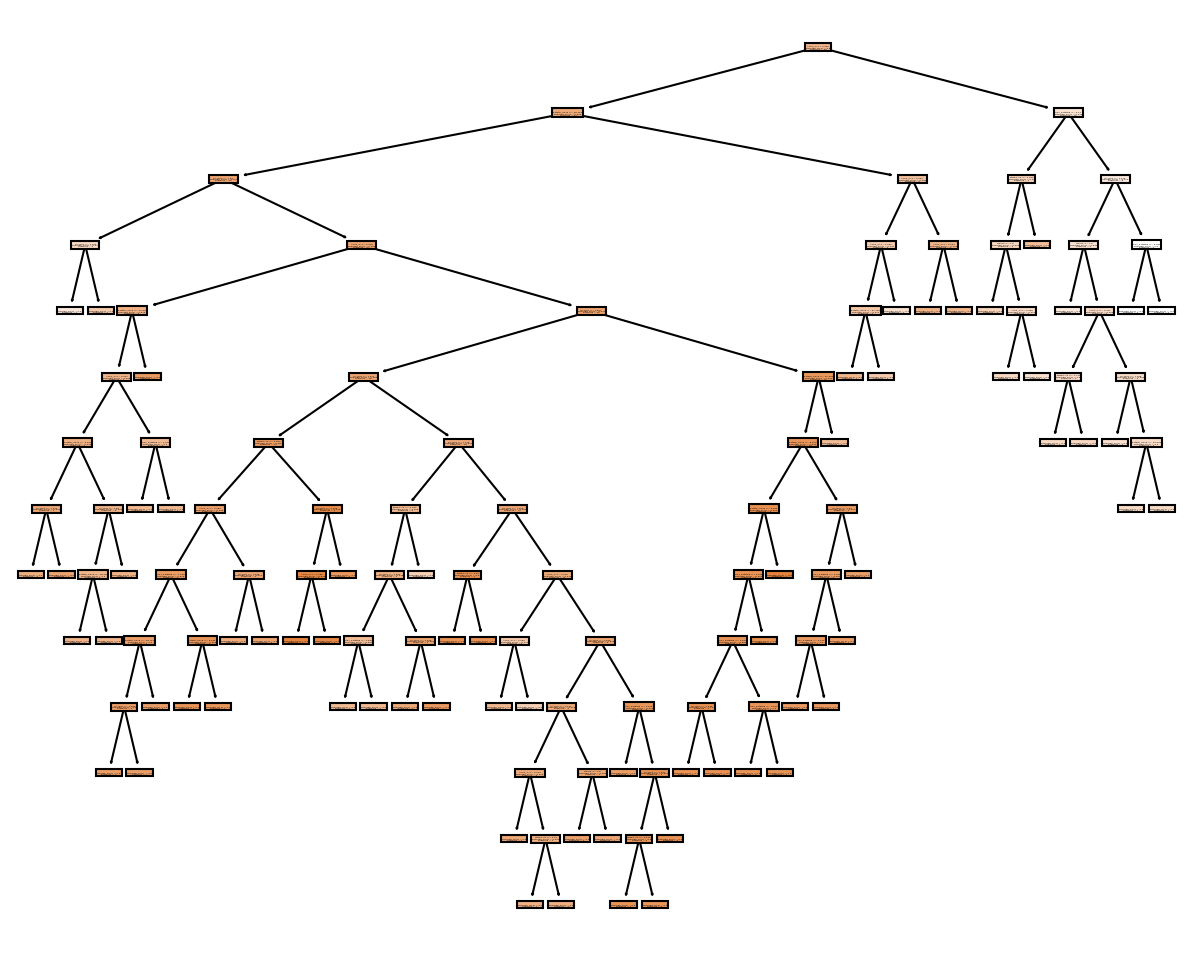

In [23]:
for x, decision_tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(hist2['molecular descriptor name']),
             filled=True)
    plt.savefig('Random_forest/random_forest_2_'+str(x)+'_model_BALB_3T3.pdf',bbox_inches = "tight")

In [24]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
226,AMID_O,-0.546843,0.546843
505,EState_VSA5,-0.588780,0.588780
556,GATS2c,0.511671,0.511671
791,MDEO-12,-0.582747,0.582747
851,NdssC,-0.526783,0.526783
1091,VSA_EState5,0.529677,0.529677


In [25]:
predicted_activity = model.predict(molecular_descriptors[hist2['molecular descriptor name']])

In [26]:
save_to_df['Predicted BALB/3T3'] = predicted_activity

In [27]:
save_to_df.head()

,SMILES,Predicted A549,Predicted BALB/3T3
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740,8.207608
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693,8.025037
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336,7.518472
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820,7.624283
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427,7.891456


# LoVo

In [28]:
## The best model is: Random Forest (correlation_threshold = 0.54, 2 features, 2 estimators, random_state=28)

In [29]:
target = 'LoVo'
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-3]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,LoVo
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,8.187087
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,8.070581
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,8.055517
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,8.070581
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.277366


In [30]:
model, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.54, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=2,
                                                                                                    target_column_name = target,
                                                                                                    random_state=28,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)
print("R^2 score: " + str(r2_score(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Mean squared error: "+str(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print('Mean absolute error: ' + str(mean_absolute_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Root Mean Square Error: "+ str(math.sqrt(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target]))))

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.027037
1                  AATS0are   -0.129823
2                    AATS0d    0.042740
3                   AATS0dv   -0.120173
4                    AATS0i    0.132395
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.027037                    0.027037
1                  AATS0are   -0.129823                    0.129823
2                    AATS0d    0.042740                    0.042740
3                   AATS0dv   -0.120173                    0.120173
4                    AATS0i    0.132395                    0.132395
     molecular descriptor name  corr_value  absolute correlation value
505                EState_VSA5   -0.579664                    0.579664
791     

In [31]:
# save
joblib.dump(model, "Random_forest/random_forest_model_3_estimators_LoVo.joblib")

['Random_forest/random_forest_model_3_estimators_LoVo.joblib']

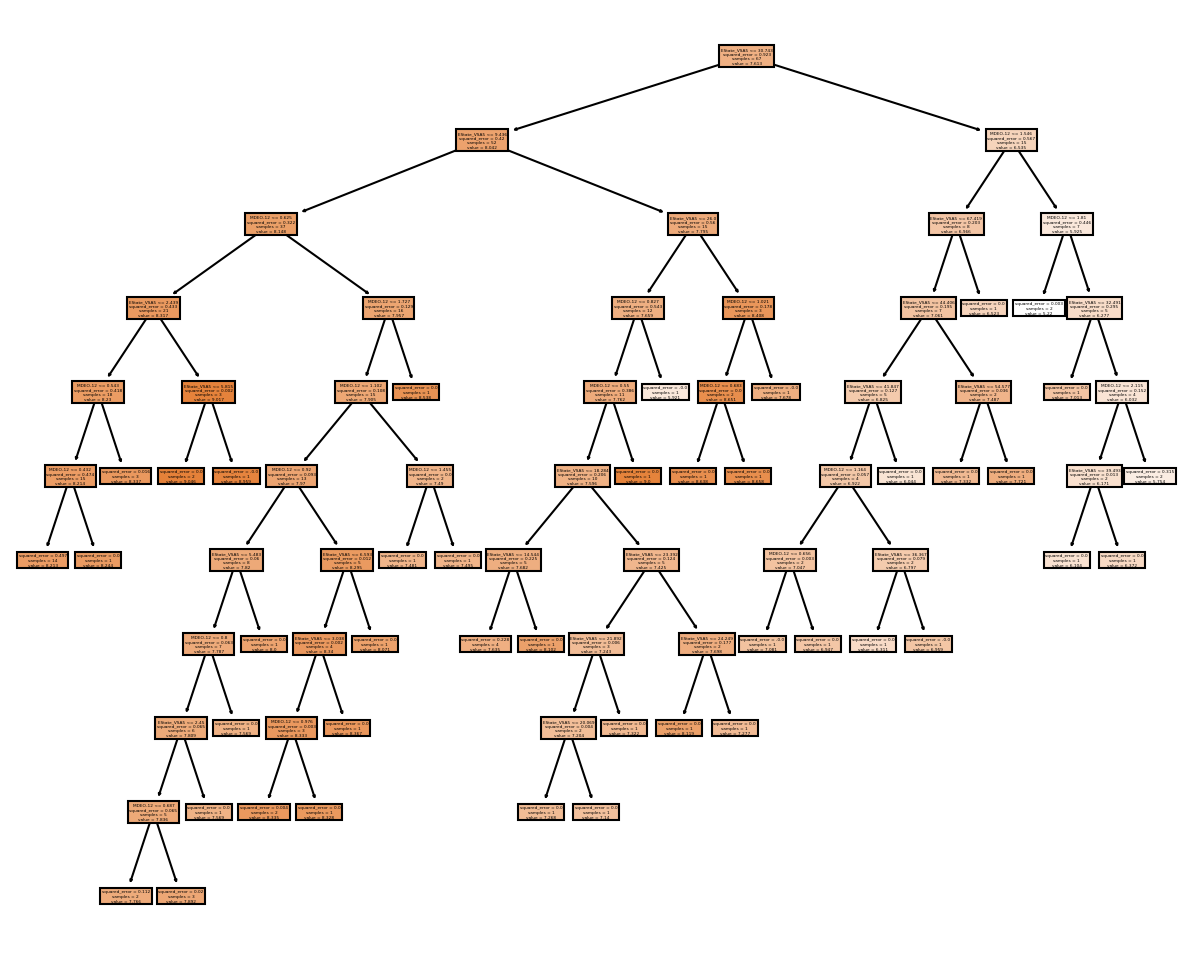

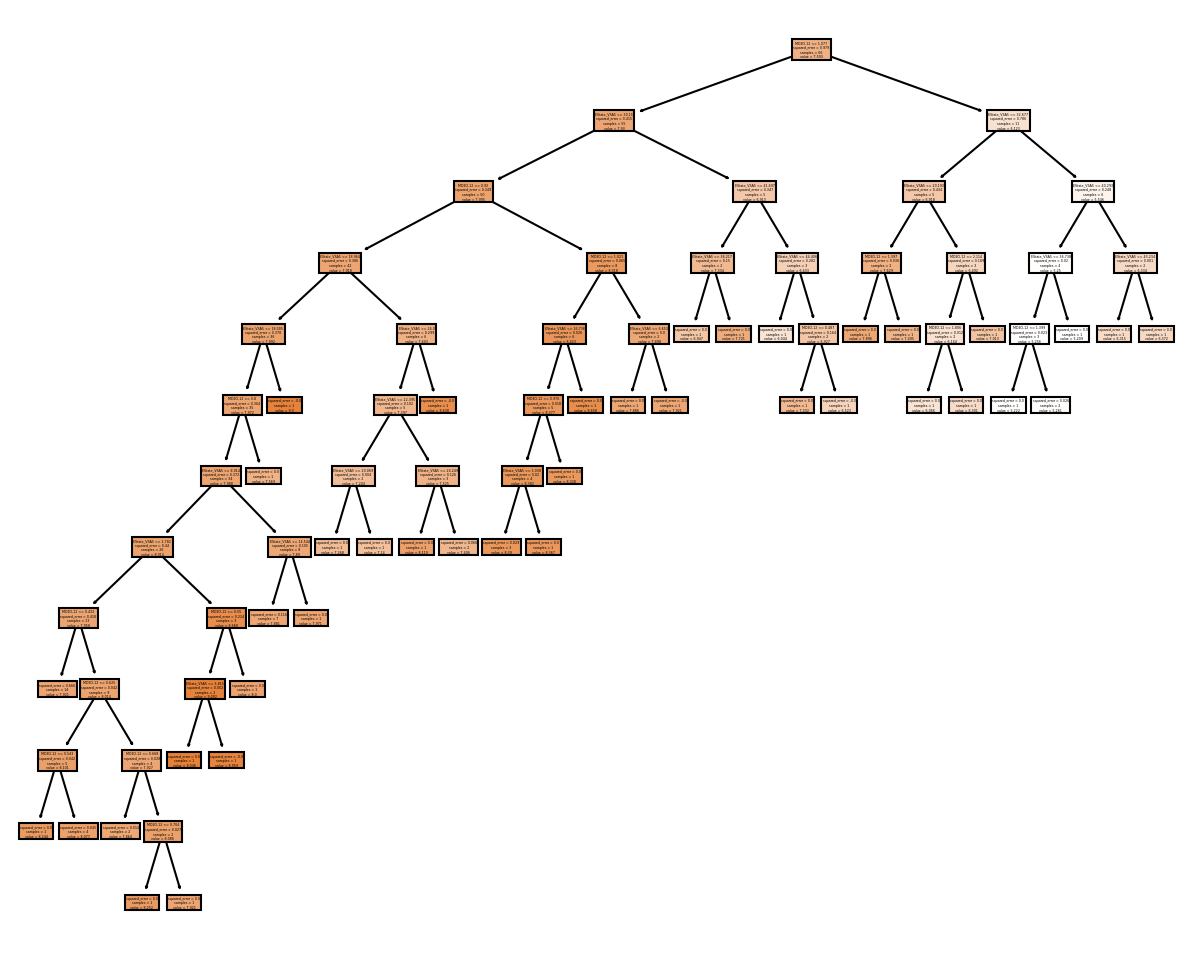

In [32]:
for x, decision_tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(hist2['molecular descriptor name']),
             filled=True)
    plt.savefig('Random_forest/random_forest_3_'+str(x)+'_model_LoVo.pdf',bbox_inches = "tight")

In [33]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
505,EState_VSA5,-0.579664,0.579664
791,MDEO-12,-0.558727,0.558727


In [34]:
predicted_activity = model.predict(molecular_descriptors[hist2['molecular descriptor name']])

In [35]:
save_to_df['Predicted LoVo'] = predicted_activity

In [36]:
save_to_df.head()

,SMILES,Predicted A549,Predicted BALB/3T3,Predicted LoVo
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740,8.207608,8.244125
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693,8.025037,7.757943
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336,7.518472,7.267606
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820,7.624283,8.067014
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427,7.891456,8.958607


# LoVo_DX

In [37]:
## The best model is: Random Forest (correlation_threshold = 0.63, 5 features, 9 estimators, random_state=42)

In [38]:
target = 'LoVo/DX'
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-2]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,LoVo/DX
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,7.260428
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,7.507240
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,7.747147
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,7.991400
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.109020


In [39]:
print(data.shape)
data = data.dropna()

(120, 1212)


In [40]:
model, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.63, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=9,
                                                                                                    target_column_name = target,
                                                                                                    random_state=42,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)
print("R^2 score: " + str(r2_score(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Mean squared error: "+str(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print('Mean absolute error: ' + str(mean_absolute_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Root Mean Square Error: "+ str(math.sqrt(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target]))))

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.018677
1                  AATS0are   -0.341313
2                    AATS0d   -0.123443
3                   AATS0dv   -0.265670
4                    AATS0i   -0.428929
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.018677                    0.018677
1                  AATS0are   -0.341313                    0.341313
2                    AATS0d   -0.123443                    0.123443
3                   AATS0dv   -0.265670                    0.265670
4                    AATS0i   -0.428929                    0.428929
     molecular descriptor name  corr_value  absolute correlation value
556                     GATS2c    0.652245                    0.652245
696     

In [41]:
# save
joblib.dump(model, "Random_forest/random_forest_model_8_estimators_LoVo_DX.joblib")

['Random_forest/random_forest_model_8_estimators_LoVo_DX.joblib']

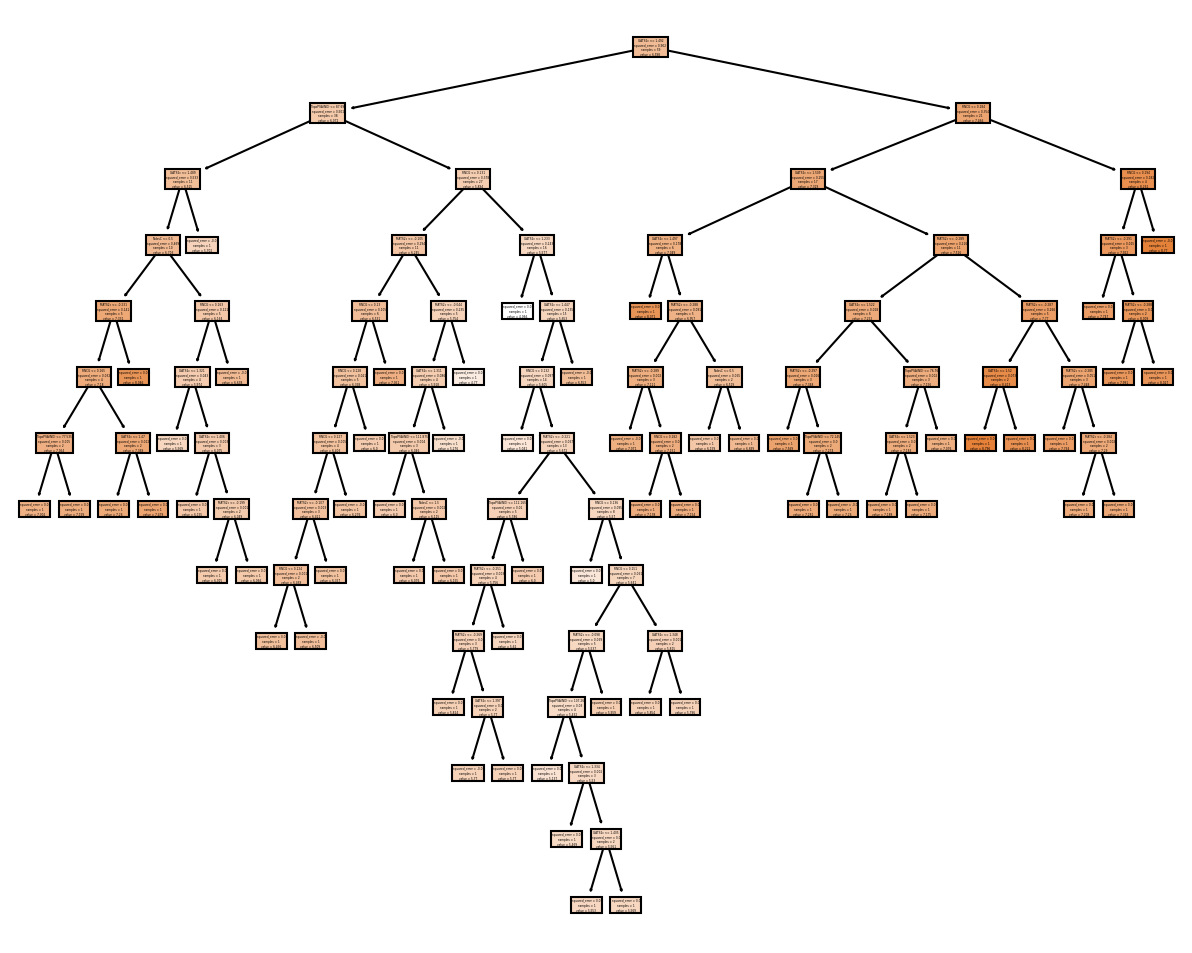

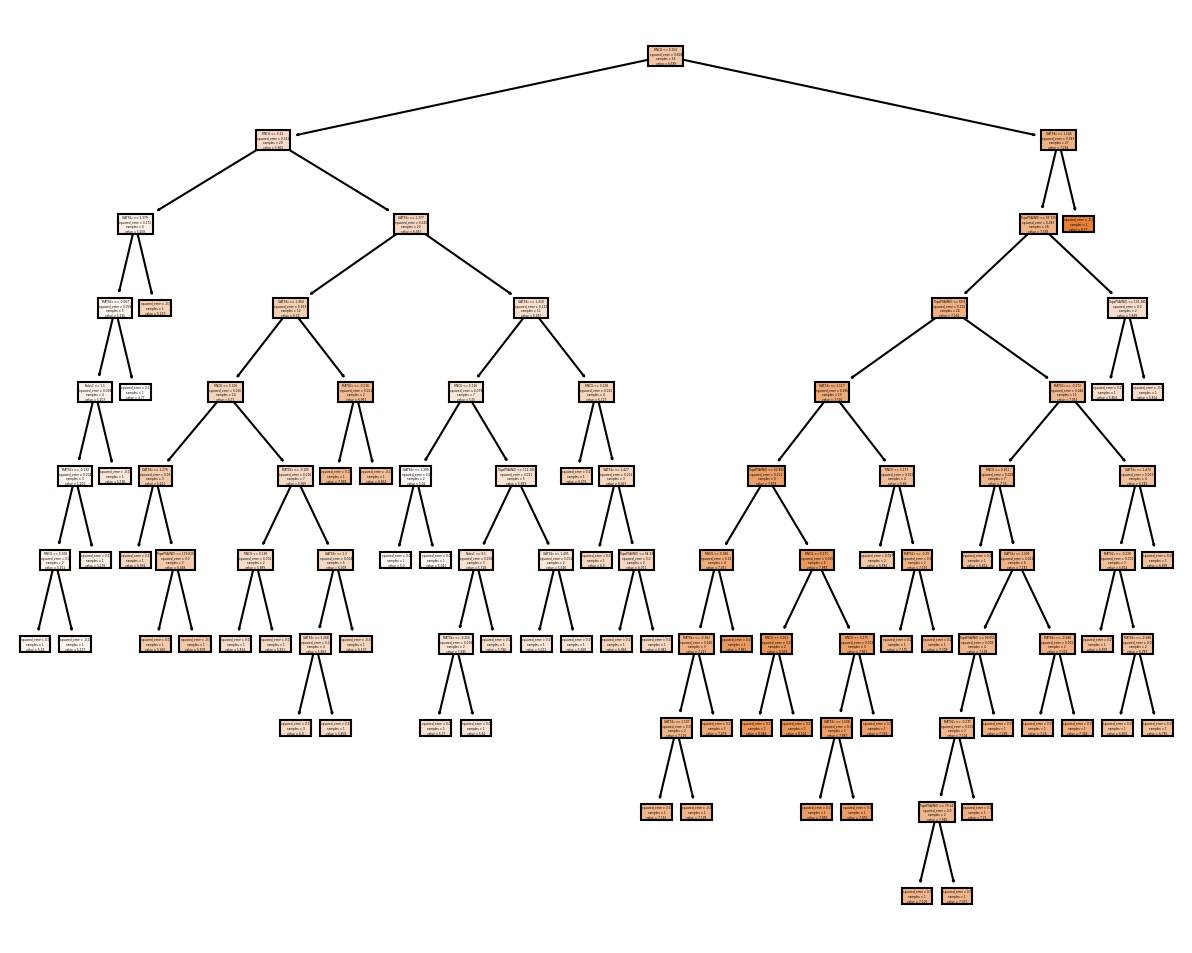

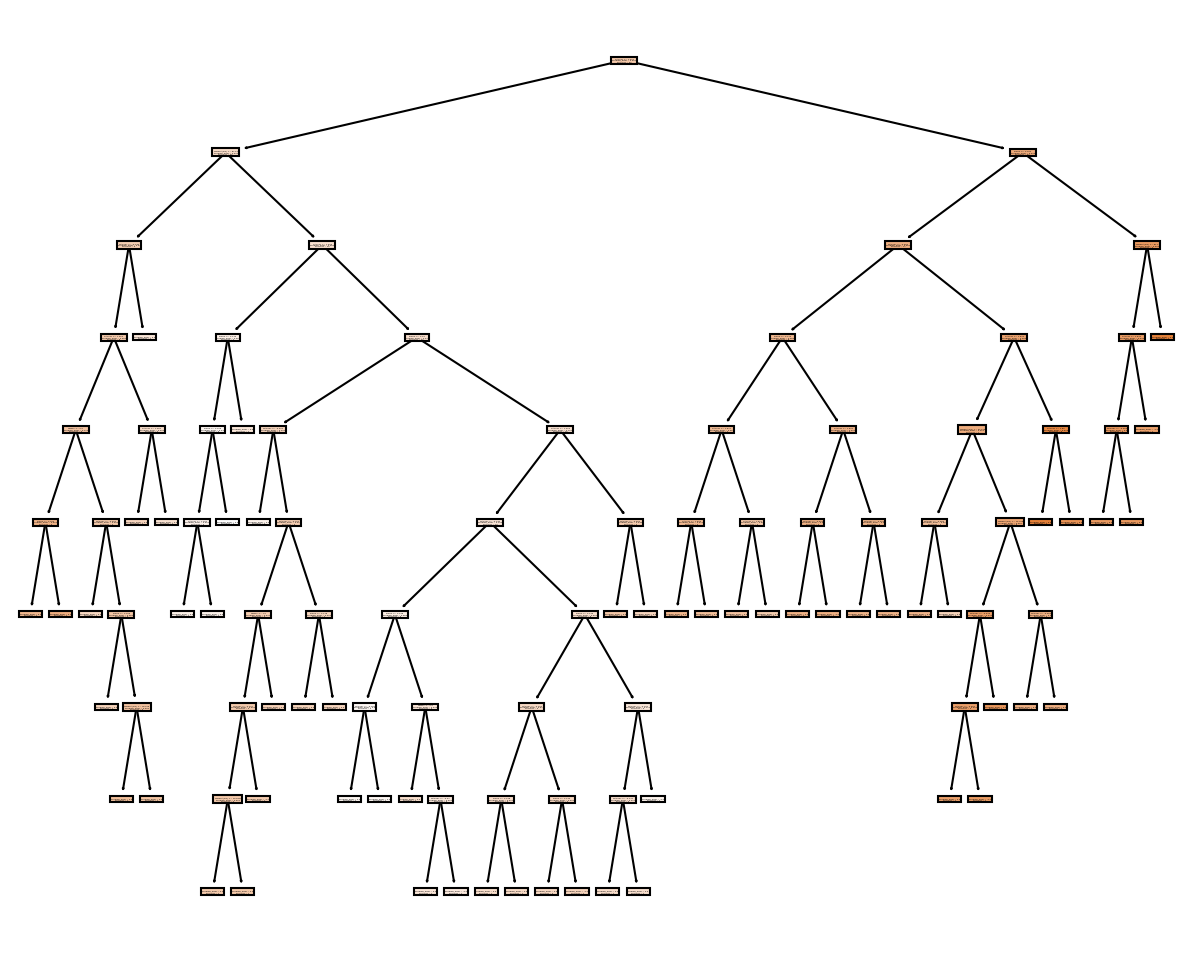

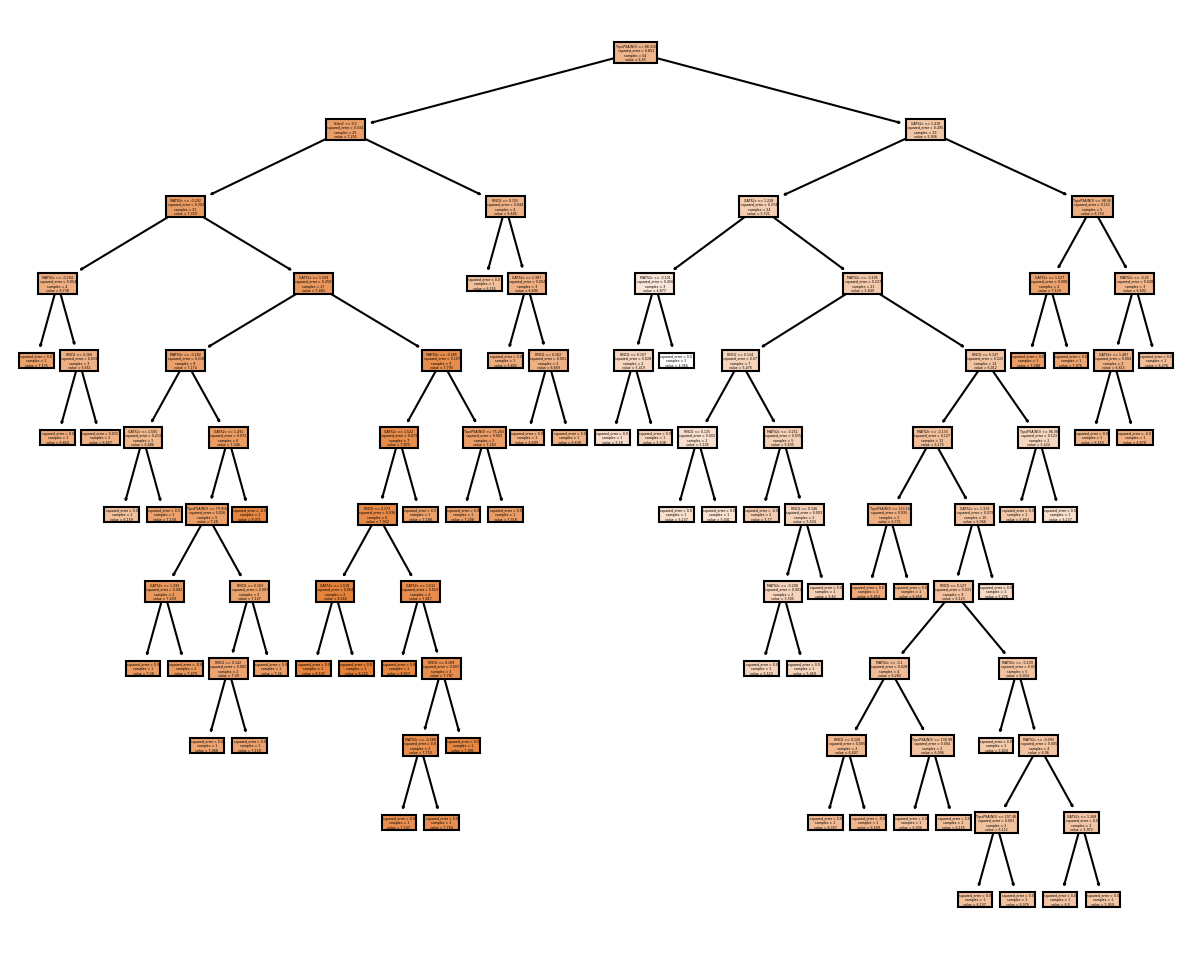

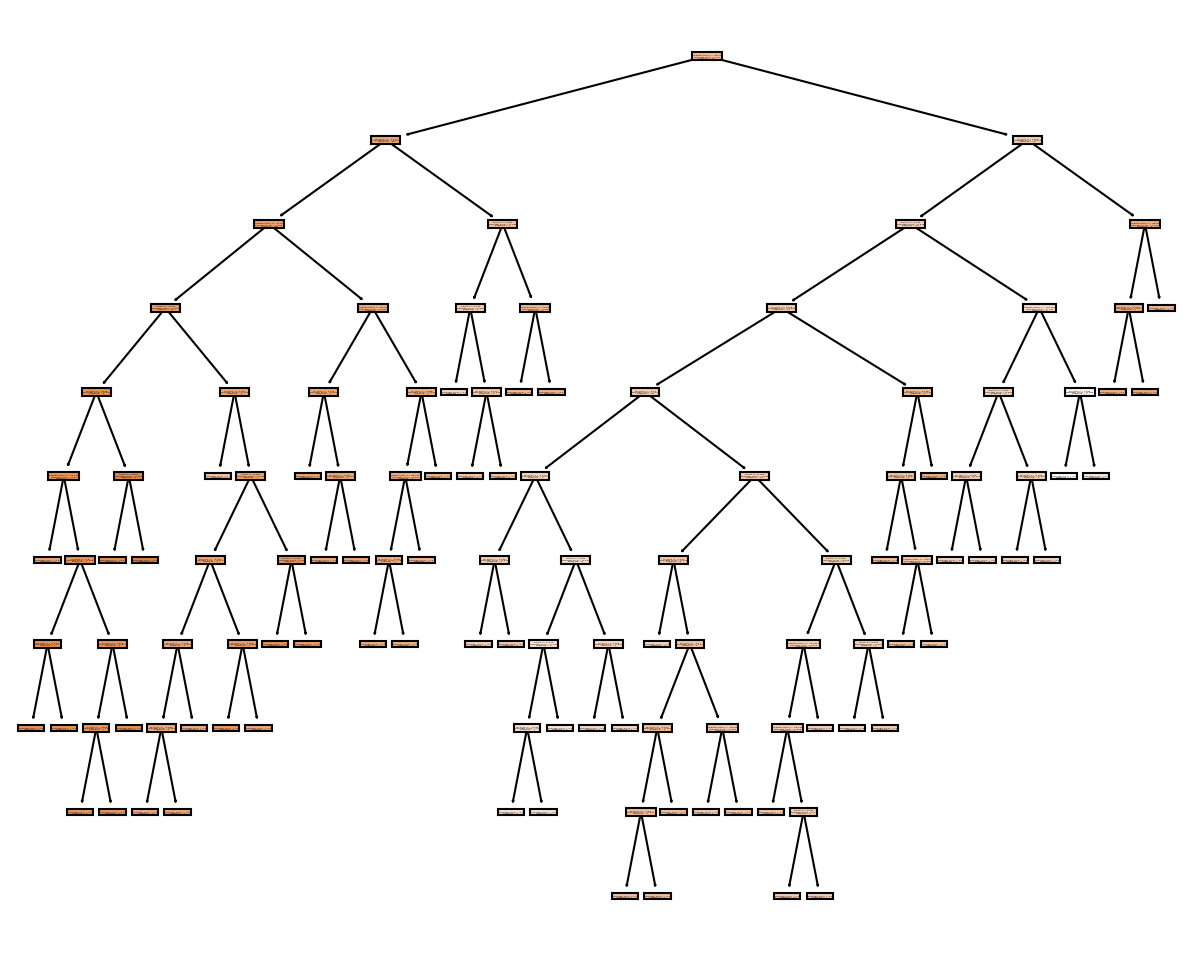

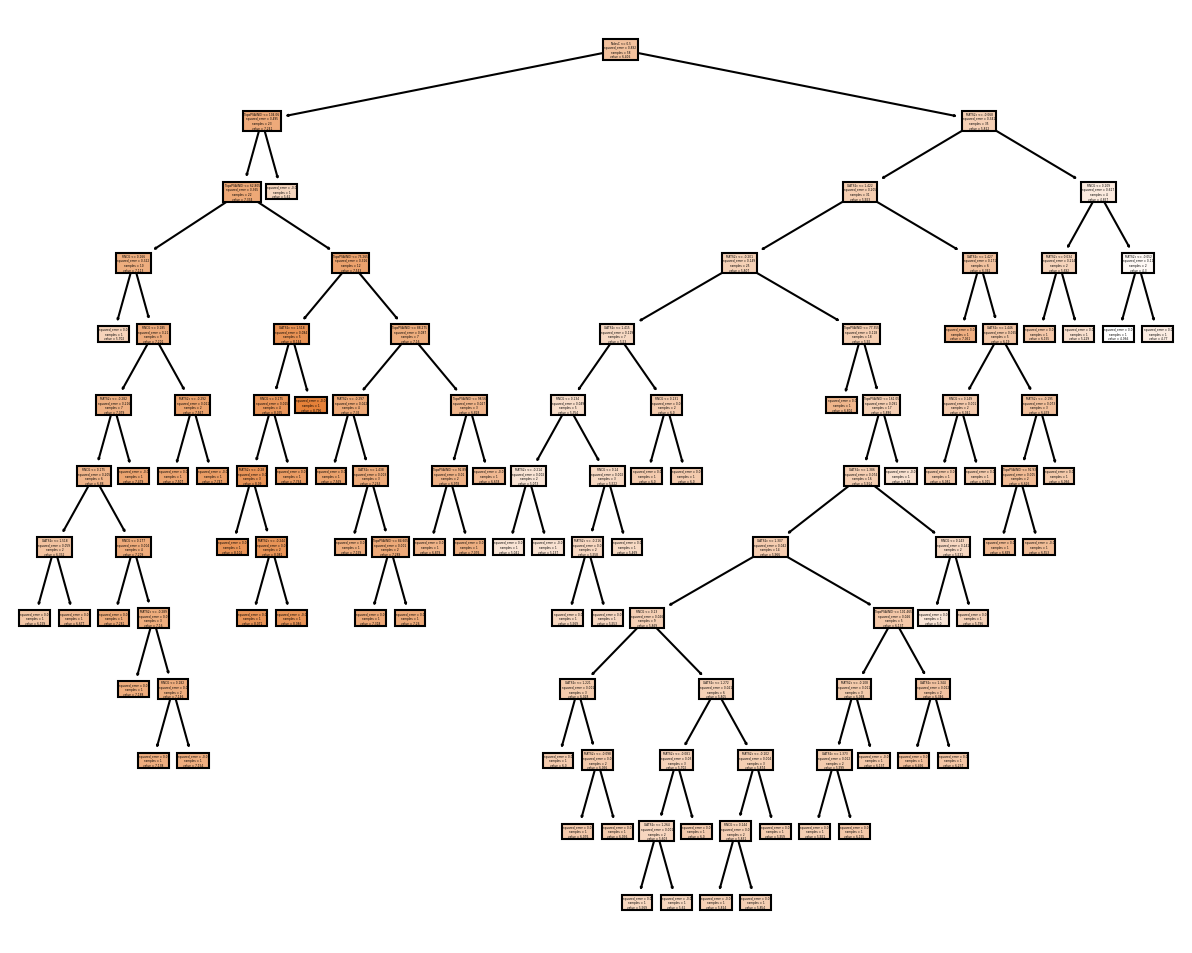

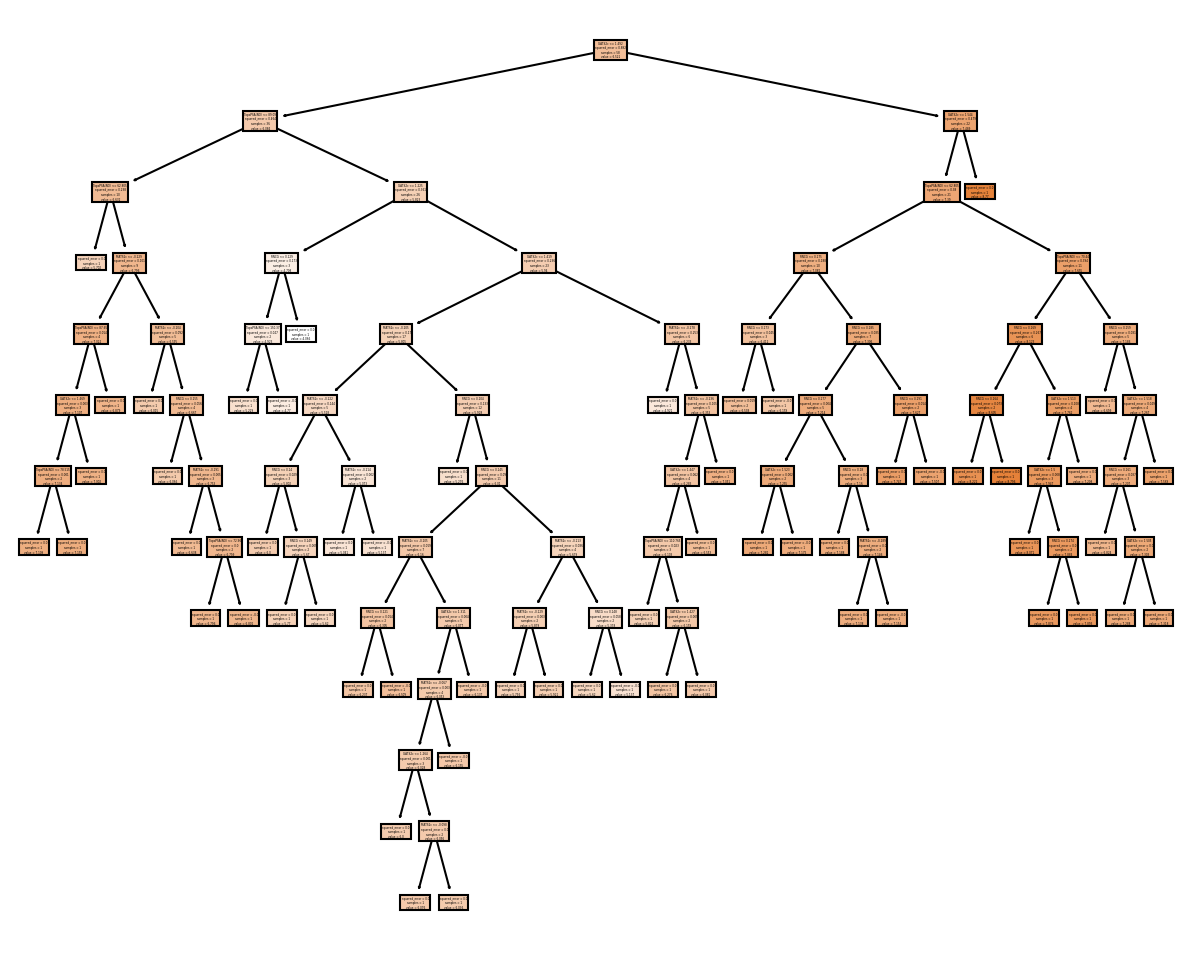

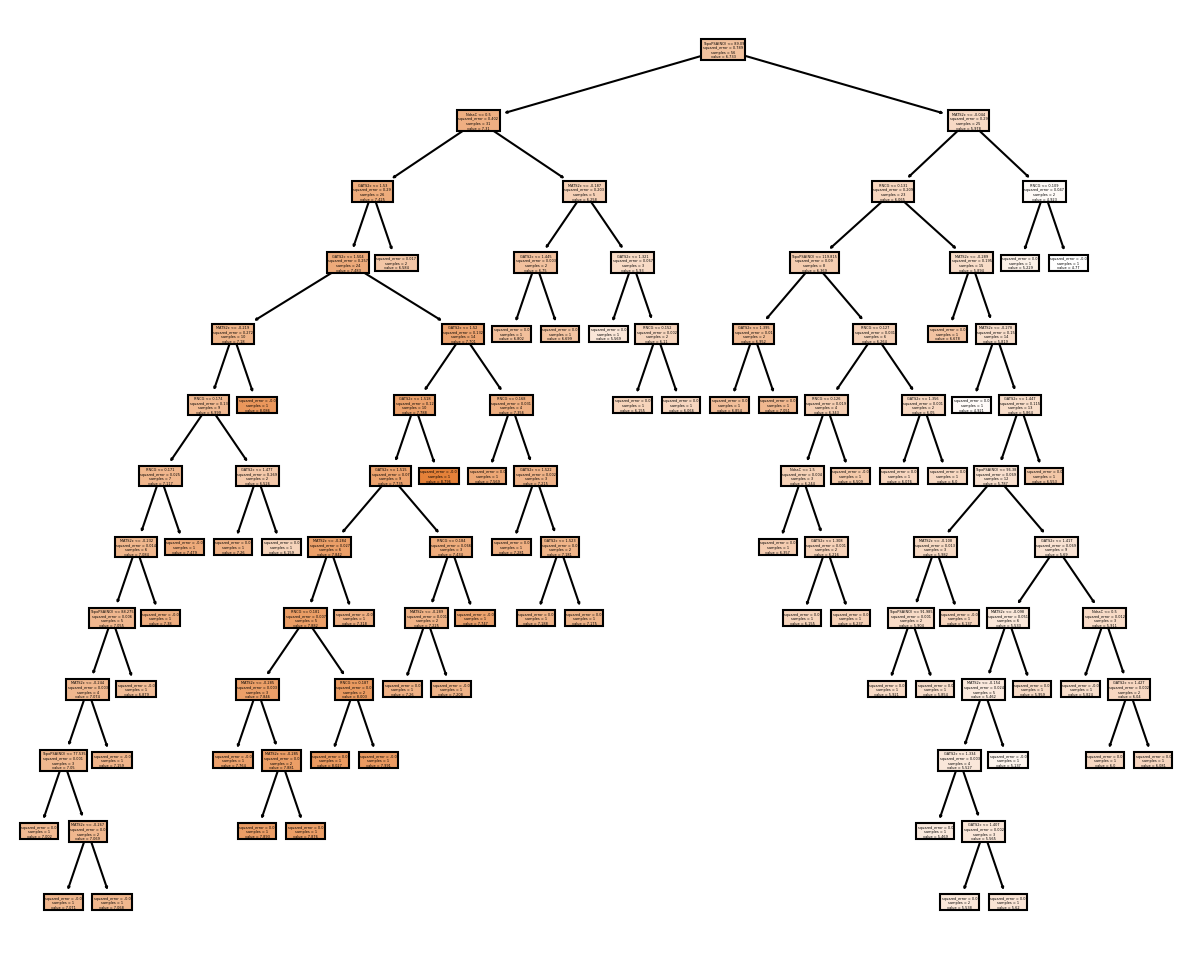

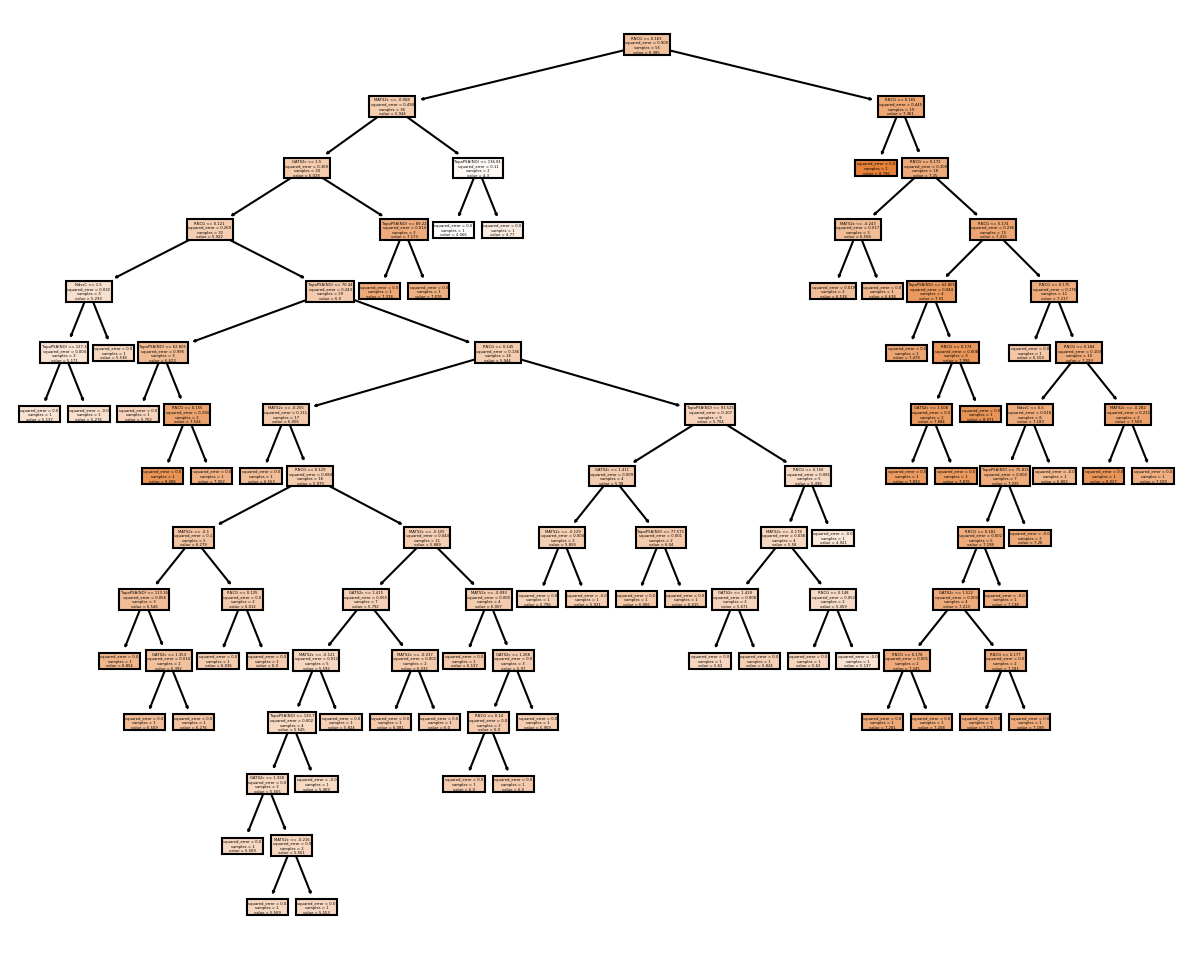

In [42]:
for x, decision_tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(hist2['molecular descriptor name']),
             filled=True)
    plt.savefig('Random_forest/random_forest_8_'+str(x)+'_model_LoVo_DX.pdf',bbox_inches = "tight")

In [43]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
556,GATS2c,0.652245,0.652245
696,MATS2c,-0.638624,0.638624
851,NdssC,-0.647960,0.647960
881,RNCG,0.663041,0.663041
1022,TopoPSA(NO),-0.635724,0.635724


In [44]:
predicted_activity = model.predict(molecular_descriptors[hist2['molecular descriptor name']])

In [45]:
save_to_df['Predicted LoVo/DX'] = predicted_activity

In [46]:
save_to_df.head()

,SMILES,Predicted A549,Predicted BALB/3T3,Predicted LoVo,Predicted LoVo/DX
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740,8.207608,8.244125,6.864594
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693,8.025037,7.757943,7.302791
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336,7.518472,7.267606,7.424738
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820,7.624283,8.067014,6.677021
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427,7.891456,8.958607,5.884919


# MCF-7

In [47]:
## The best model is: Random Forest (correlation_threshold = 0.51, 4 features, 3 estimators, random_state=15)

In [48]:
target = 'MCF-7'
data = load_prepared_data[list(load_prepared_data.columns)[0:-10]]
data[target] = load_prepared_data[load_prepared_data.columns[-4]]
data.head()

,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0s,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,MCF-7
0,25.090909,6.046518,3.109091,6.662626,160.775045,99.075564,1.555512,6.126680,3.435416,7.629859,...,7.999655,4.266195,4.915408,5.516700,6.098566,6.595759,6.979116,7.337313,7.681445,7.987163
1,24.448276,6.008422,3.051724,6.386973,161.021674,96.473315,1.538471,6.088791,3.330998,7.596891,...,8.018726,4.280132,4.922714,5.520711,6.103048,6.601209,6.985613,7.349442,7.695531,7.920819
2,23.868852,5.974074,3.000000,6.138434,161.244045,94.127025,1.523105,6.054630,3.236850,7.567166,...,8.028799,4.293878,4.929967,5.524706,6.105281,6.603923,6.989306,7.353932,7.704023,7.913640
3,23.868852,5.974074,3.032787,6.171220,161.244045,94.127025,1.523105,6.054630,3.257798,7.567166,...,8.037440,4.307438,4.929967,5.524706,6.107510,6.606629,6.992068,7.361425,7.709420,7.946922
4,23.343750,5.942945,2.953125,5.913194,161.445569,92.000700,1.509180,6.023670,3.151529,7.540228,...,8.034892,4.307438,4.937168,5.528685,6.107510,6.605277,6.991148,7.356489,7.707175,7.032920


In [49]:
model, train_r2_, test_r2_, hist1, hist2, target_column_name, training_data_RMSE, test_data_RMSE  = pred_model.prepare_data_and_create_model(molecular_descriptors_df=data, 
                                                                                                    correlation_threshold=0.51, 
                                                                                                    standardization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=3,
                                                                                                    target_column_name = target,
                                                                                                    random_state=15,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=True)
print("R^2 score: " + str(r2_score(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Mean squared error: "+str(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print('Mean absolute error: ' + str(mean_absolute_error(model.predict(data[hist2['molecular descriptor name']]), data[target])))
print("Root Mean Square Error: "+ str(math.sqrt(mean_squared_error(model.predict(data[hist2['molecular descriptor name']]), data[target]))))

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.038502
1                  AATS0are   -0.120847
2                    AATS0d    0.041648
3                   AATS0dv   -0.115899
4                    AATS0i    0.191765
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.038502                    0.038502
1                  AATS0are   -0.120847                    0.120847
2                    AATS0d    0.041648                    0.041648
3                   AATS0dv   -0.115899                    0.115899
4                    AATS0i    0.191765                    0.191765
     molecular descriptor name  corr_value  absolute correlation value
226                     AMID_O   -0.520578                    0.520578
505     

In [50]:
# save
joblib.dump(model, "Random_forest/random_forest_model_3_estimators_MCF-7.joblib")

['Random_forest/random_forest_model_3_estimators_MCF-7.joblib']

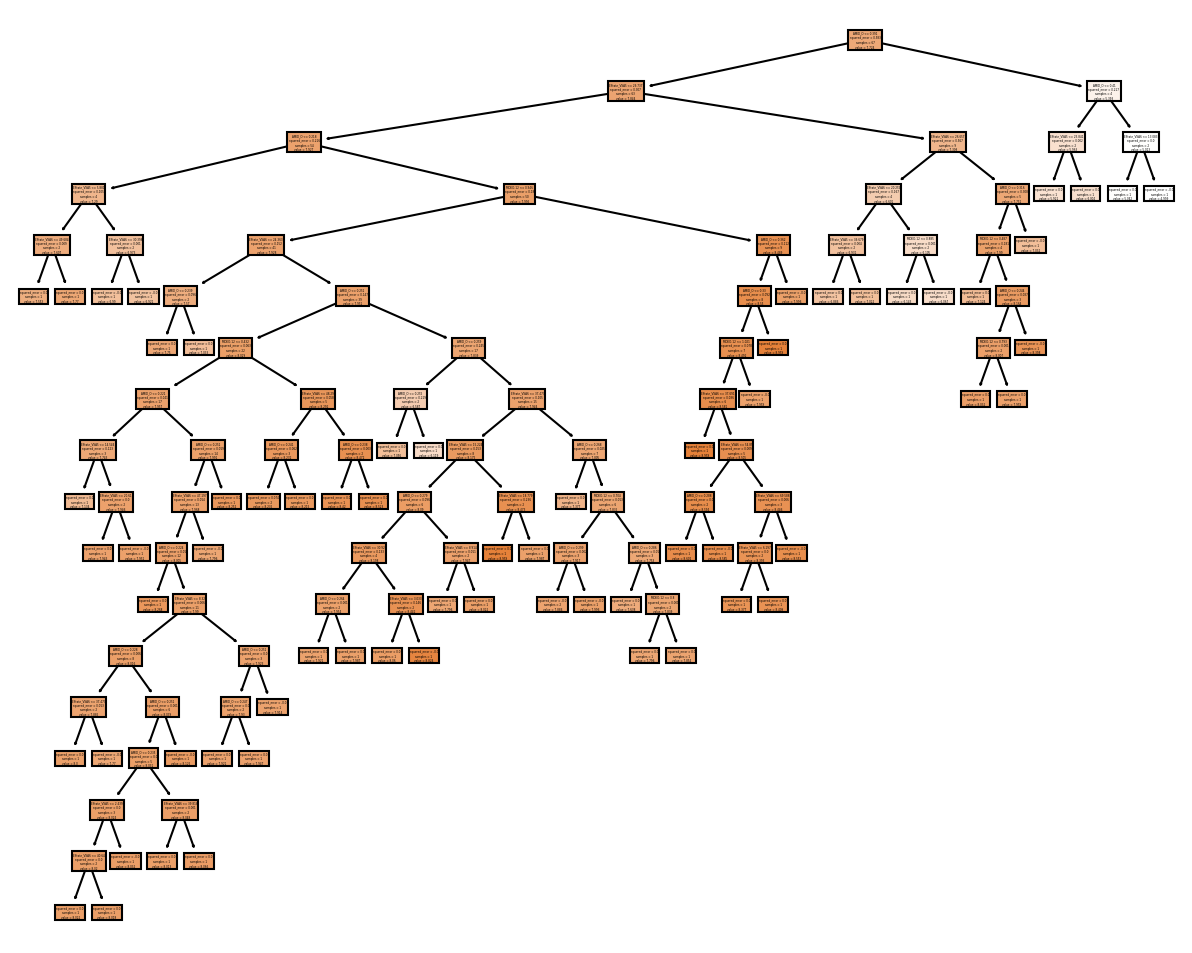

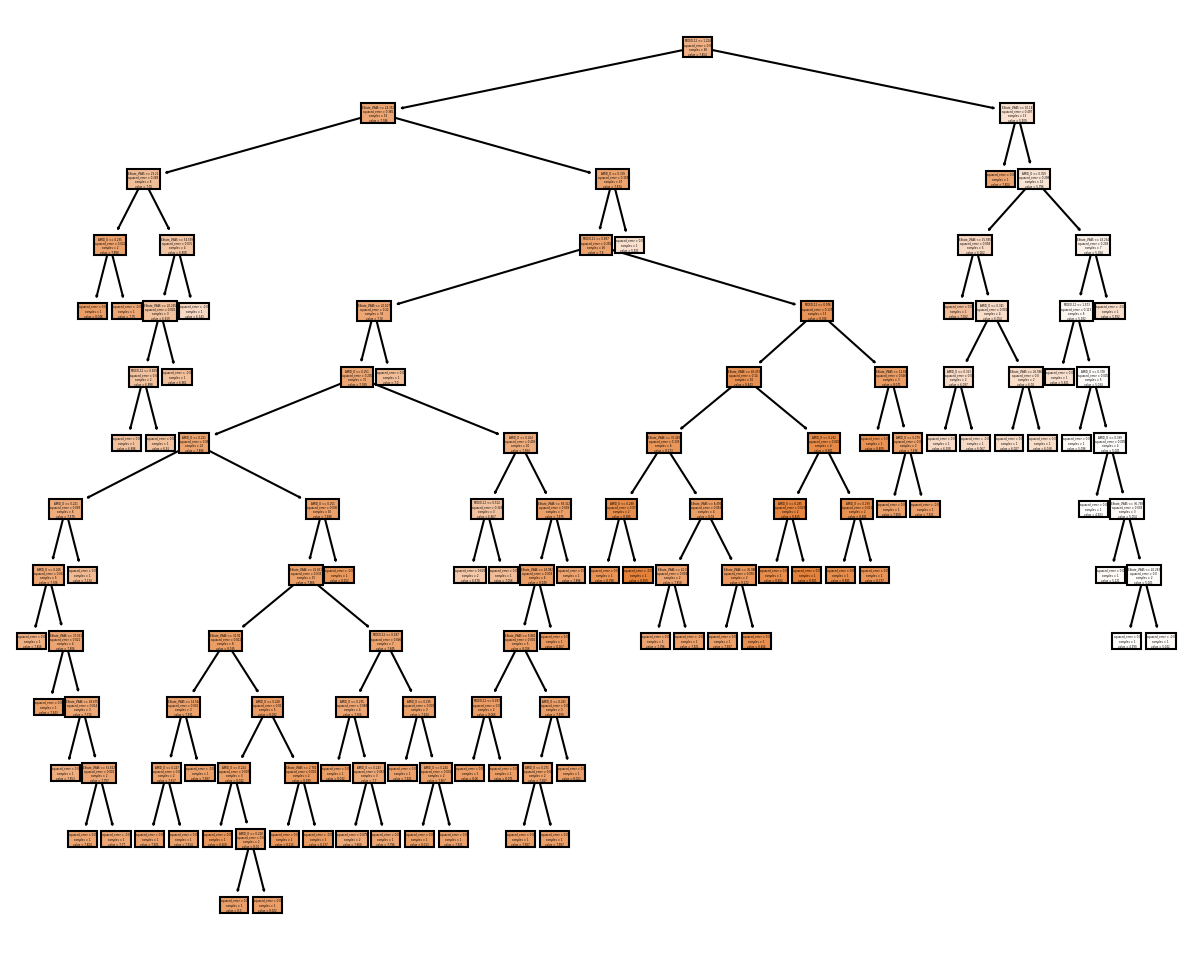

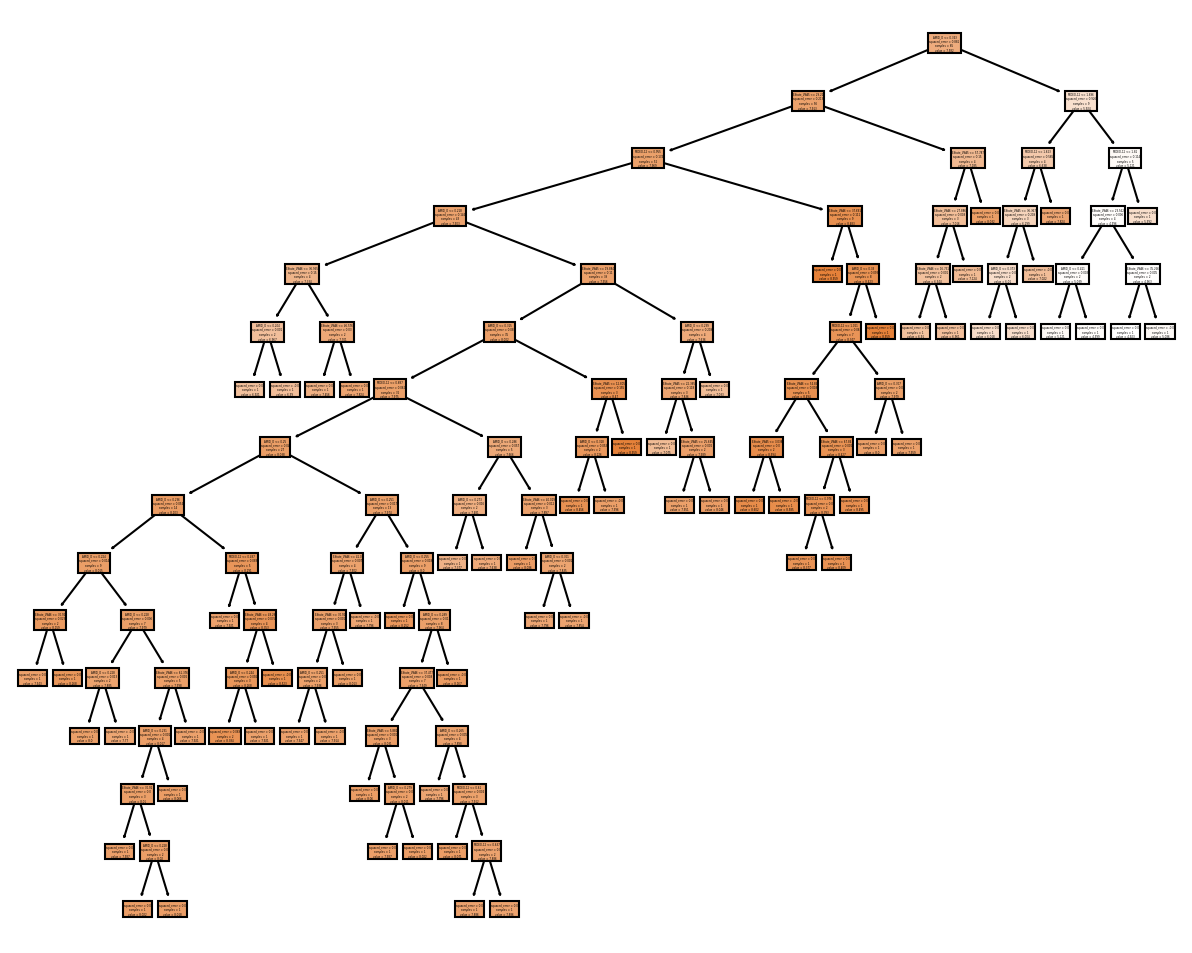

In [51]:
for x, decision_tree in enumerate(model.estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(hist2['molecular descriptor name']),
             filled=True)
    plt.savefig('Random_forest/random_forest_3_'+str(x)+'_model_MCF-7.pdf',bbox_inches = "tight")

In [52]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
226,AMID_O,-0.520578,0.520578
505,EState_VSA5,-0.578904,0.578904
506,EState_VSA6,0.519794,0.519794
791,MDEO-12,-0.525441,0.525441


In [53]:
predicted_activity = model.predict(molecular_descriptors[hist2['molecular descriptor name']])

In [54]:
save_to_df['Predicted MCF-7'] = predicted_activity

In [55]:
save_to_df.head()

,SMILES,Predicted A549,Predicted BALB/3T3,Predicted LoVo,Predicted LoVo/DX,Predicted MCF-7
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740,8.207608,8.244125,6.864594,8.077917
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693,8.025037,7.757943,7.302791,7.992772
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336,7.518472,7.267606,7.424738,8.040999
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820,7.624283,8.067014,6.677021,8.267606
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427,7.891456,8.958607,5.884919,8.042845


In [56]:
save_to_df['A549 [nM]'] = pred_model.inverse_transform(save_to_df['Predicted A549'])
save_to_df['BALB/3T3 [nM]'] = pred_model.inverse_transform(save_to_df['Predicted BALB/3T3'])
save_to_df['LoVo [nM]'] = pred_model.inverse_transform(save_to_df['Predicted LoVo'])
save_to_df['LoVo/DX [nM]'] = pred_model.inverse_transform(save_to_df['Predicted LoVo/DX'])
save_to_df['MCF-7 [nM]'] = pred_model.inverse_transform(save_to_df['Predicted MCF-7'])
save_to_df.head()

,SMILES,Predicted A549,Predicted BALB/3T3,Predicted LoVo,Predicted LoVo/DX,Predicted MCF-7,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM]
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.992740,8.207608,8.244125,6.864594,8.077917,10.168579,6.200000,5.700000,136.586050,8.357629
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.972693,8.025037,7.757943,7.302791,7.992772,10.648944,9.439809,17.460496,49.797629,10.167834
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,7.928336,7.518472,7.267606,7.424738,8.040999,11.794066,30.305940,54.000000,37.606395,9.099151
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,8.193820,7.624283,8.067014,6.677021,8.267606,6.400000,23.752895,8.570105,210.367783,5.400000
4,COC1=CC2=CC=C(NC)C(C=C2[C@@H1](N3C=C(N=N3)CN)C...,7.114427,7.891456,8.958607,5.884919,8.042845,76.837491,12.839393,1.100000,1303.411000,9.060555


In [57]:
save_to_df.to_excel('../Data/Predicted_activities.xlsx')